In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
data_path = "/home/jorge/Documents/data/sgr/workspace/XL/second_iteration.fits"
t = Table.read(data_path, format="fits")

In [3]:
t_sel = t[t["probability"] >= 0.75]

In [20]:
t_bg = t[t["probability"] < 0.1]

In [21]:
import numpy as np
rows_numbers_to_keep = np.random.choice(len(t_bg), 80_000, replace=False)
t_bg = t_bg[rows_numbers_to_keep]

In [22]:
len(t_bg)

80000

In [12]:
t_sel.write("/home/jorge/Documents/data/sgr/workspace/XL/second_iteration_p_gt_0.75.fits", format="fits")

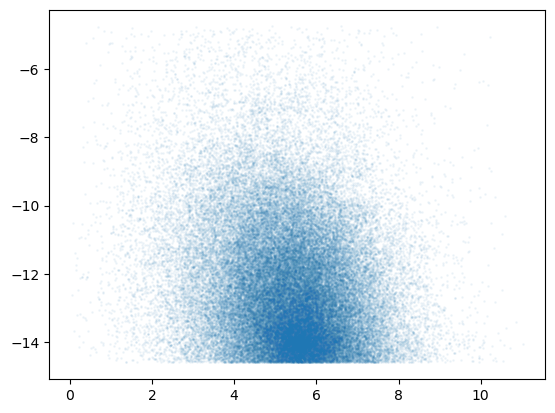

In [13]:
plt.scatter(t_sel["l"], t_sel["b"], s=1, alpha=0.05)

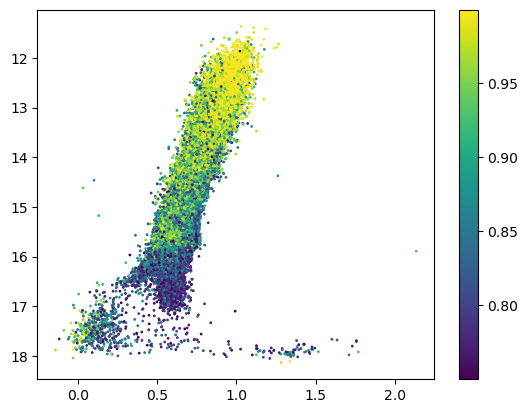

In [15]:
plt.scatter(t_sel["mag_J-mag_Ks"], t_sel["mag_Ks"], c=t_sel["probability"], s=1)
plt.gca().invert_yaxis()
plt.colorbar()

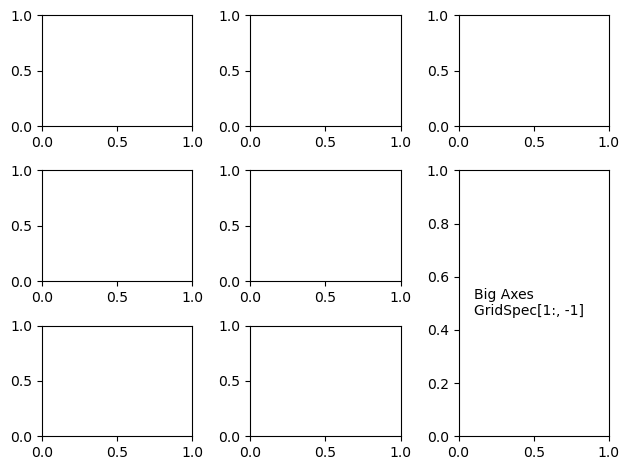

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[1, 2].get_gridspec()
# remove the underlying axes
for ax in axs[1:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

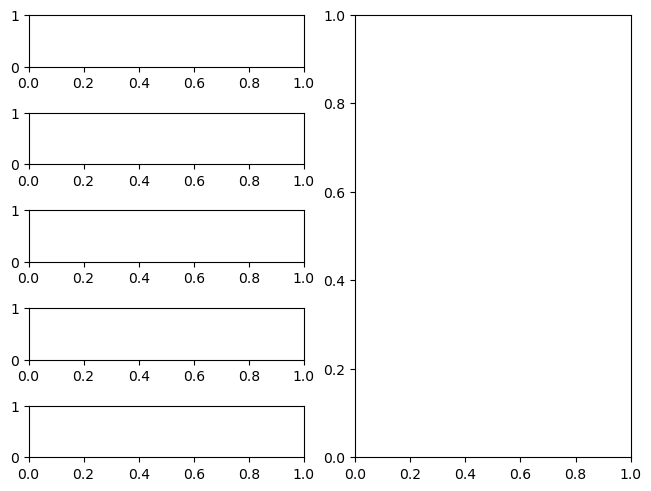

In [23]:
# Plot the raw time series
fig, axs = plt.subplot_mosaic([
    ['pm1', 'cmd'],
    ['pm2', 'cmd'],
    ['pm3', 'cmd'],
    ['pm4', 'cmd'],
    ['pm5', 'cmd'],
], layout='constrained')

axs['pm1'].plot()

# Work in progress

In [24]:
from sgrmemb.plots import plot_proper_motions
import pandas as pd

In [26]:
df = t_sel.to_pandas()
df_bg = t_bg.to_pandas()

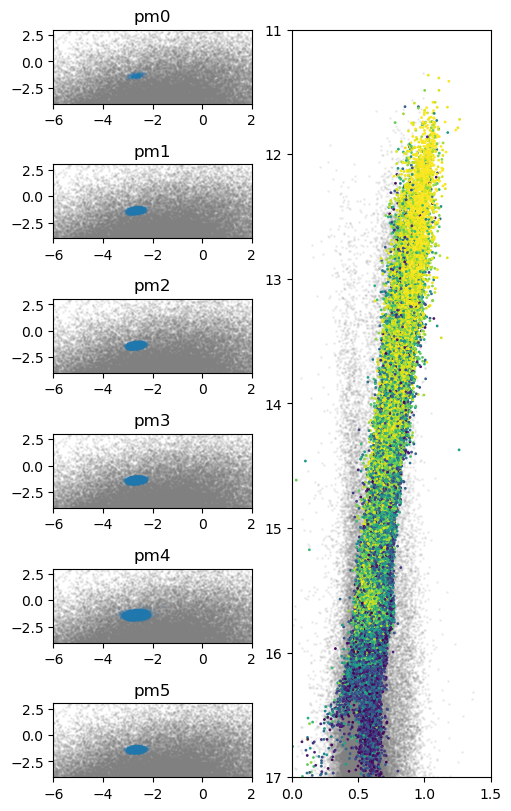

In [55]:
# Plot the raw time series
fig, axs = plt.subplot_mosaic([
    ['pm0', 'cmd'],
    ['pm1', 'cmd'],
    ['pm2', 'cmd'],
    ['pm3', 'cmd'],
    ['pm4', 'cmd'],
    ['pm5', 'cmd'],
], layout='constrained', figsize=(5, 8))

# pm0
df0 = df.query("mag_Ks >= 11 and mag_Ks < 12")
axs['pm0'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm0'].scatter(df0.pmra, df0.pmdec, s=1, alpha=0.1)
axs['pm0'].set_xlim(-6, 2)
axs['pm0'].set_ylim(-4, 3)

# pm1
df1 = df.query("mag_Ks >= 12 and mag_Ks < 13")
axs['pm1'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm1'].scatter(df1.pmra, df1.pmdec, s=1, alpha=0.1)

# pm2
df2 = df.query("mag_Ks >= 13 and mag_Ks < 14")
axs['pm2'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm2'].scatter(df2.pmra, df2.pmdec, s=1, alpha=0.1)

# pm3
df3 = df.query("mag_Ks >= 14 and mag_Ks < 15")
axs['pm3'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm3'].scatter(df3.pmra, df3.pmdec, s=1, alpha=0.1)

# pm4
df4 = df.query("mag_Ks >= 15 and mag_Ks < 16")
axs['pm4'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm4'].scatter(df4.pmra, df4.pmdec, s=1, alpha=0.1)

# pm5
df5 = df.query("mag_Ks >= 16 and mag_Ks < 17")
axs['pm5'].scatter(df_bg.pmra, df_bg.pmdec, s=1, c="grey", alpha=0.1)
axs['pm5'].scatter(df5.pmra, df5.pmdec, s=1, alpha=0.1)

# cmd
dfcmd = df.query("mag_Ks >= 11 and mag_Ks < 17")
axs['cmd'].scatter(df_bg["mag_J-mag_Ks"], df_bg["mag_Ks"], s=1, c="grey", alpha=0.1)
axs['cmd'].scatter(dfcmd["mag_J-mag_Ks"], dfcmd["mag_Ks"], c=dfcmd["probability"], s=1)
axs['cmd'].set_xlim(0, 1.5)
axs['cmd'].set_ylim(11, 17)
axs['cmd'].invert_yaxis()

for title, ax in axs.items():
    if title == 'cmd':
        continue

    ax.set_title(title)
    ax.sharex(axs['pm0'])
    ax.sharey(axs['pm0'])